In [1]:
import xarray
import pathlib
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [2]:
technical_path = pathlib.Path('../../workflow/output/aachen-union-z19/technical')

In [3]:
ds = xarray.open_dataset(str(technical_path / 'technical.nc'))

In [4]:
ds.info()

xarray.Dataset {
dimensions:
	superst_id = 323 ;
	filtered_id = 33803 ;
	location = 37747 ;
	time = 17520 ;

variables:
	int64 superst_id(superst_id) ;
	object superst_wkt_latlon(superst_id) ;
	object superst_wkt_xy(superst_id) ;
	int64 superst_seg_class(superst_id) ;
	float64 superst_img_center_lat(superst_id) ;
	float64 superst_img_center_lon(superst_id) ;
	float64 superst_area(superst_id) ;
	object filtered_wkt_latlon(filtered_id) ;
		filtered_wkt_latlon:type = str ;
		filtered_wkt_latlon:str_format = wkt ;
	object filtered_wkt_xy(filtered_id) ;
		filtered_wkt_xy:type = str ;
		filtered_wkt_xy:str_format = wkt ;
	float64 filtered_img_center_lat(filtered_id) ;
		filtered_img_center_lat:type = float ;
	float64 filtered_img_center_lon(filtered_id) ;
		filtered_img_center_lon:type = float ;
	float64 filtered_azimuth(filtered_id) ;
		filtered_azimuth:type = float ;
	float64 filtered_tilt(filtered_id) ;
		filtered_tilt:type = float ;
	float64 filtered_flat(filtered_id) ;
		filtered_flat:t

In [5]:
print(f'Total rooftop area: {ds.section_area.sum().item()} square meters.')
print(f'Total panel area: {ds.section_panel_area.sum().item()} square meters.')
print(f'Average capacity factor: {ds.section_yearly_capacity_factor.mean().item() * 100}%.')
print(f'Total panel capacity: {ds.section_capacity.sum().item() / 1000} kW.')
print(f'Mean hourly generation: {ds.section_yearly_system_generation.sum().item() / 365 / 24 / 1000} kWh.')
print(f'Total yearly generation: {ds.section_yearly_system_generation.sum().item() / 1000 / 1000 / 1000} GWh.')

Total rooftop area: 11781232.253054094 square meters.
Total panel area: 3765397.9047999997 square meters.
Average capacity factor: 10.299825561872291%.
Total panel capacity: 806621.83 kW.
Mean hourly generation: 85220.49694901987 kWh.
Total yearly generation: 746.531553273414 GWh.


In [6]:
sample_section = 0

print(f'Analyzing sample {ds.location[sample_section].item()}')
print(f'Total rooftop area: {ds.section_area[sample_section].item()} square meters.')
print(f'Total panel area: {ds.section_panel_area[sample_section].item()} square meters.')
print(f'Average capacity factor: {ds.section_yearly_capacity_factor[sample_section].item() * 100}%.')
print(f'Total panel capacity: {ds.section_capacity[sample_section].item() / 1000} kW.')
print(f'Mean hourly generation: {ds.section_yearly_system_generation[sample_section].item() / 365 / 24 / 1000} kW.')
print(f'Total yearly generation: {ds.section_yearly_system_generation[sample_section].item() / 1000 / 1000 / 1000} GWh.')

Analyzing sample 0
Total rooftop area: 94.72847252191295 square meters.
Total panel area: 27.6352 square meters.
Average capacity factor: 10.219914698318345%.
Total panel capacity: 5.92 kW.
Mean hourly generation: 0.6050189501404396 kW.
Total yearly generation: 0.005299966003230252 GWh.


In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Filtering sections

In [8]:
print(f'Original length: {len(ds.location)}')

filter_ds = ds[['section_azimuth', 'section_tilt', 'section_area', 'section_capacity',
                'section_panel_area', 'section_yearly_system_generation',
                'section_yearly_capacity_factor', 'panel_yearly_system_generation',
                'panel_capacity']]

print('Filtering azimuth and tilt...')

filter_ds = filter_ds.where(filter_ds.section_azimuth >= 90, drop=True)
filter_ds = filter_ds.where(filter_ds.section_azimuth <= 270, drop=True)
print(f'Length after filtering azimuth: {len(filter_ds.location)}')

mean_area = ds.section_area.mean().item()
std_area = ds.section_area.std().item()
filter_ds = filter_ds.where(filter_ds.section_area < (mean_area + std_area * 3), drop=True)

print(f'Length after filtering std area: {len(filter_ds.location)}')

Original length: 37747
Filtering azimuth and tilt...
Length after filtering azimuth: 35401
Length after filtering std area: 34804


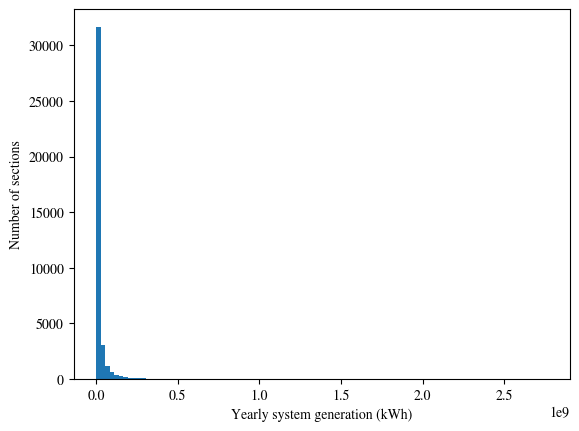

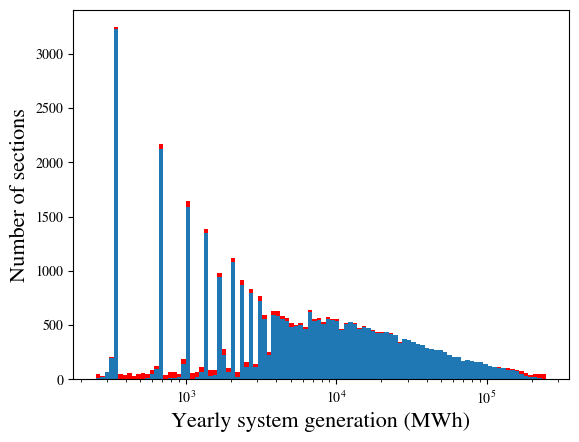

In [14]:
x1 = filter_ds.section_yearly_system_generation.sortby(filter_ds.section_yearly_system_generation)
x2 = ds.section_yearly_system_generation.sortby(ds.section_yearly_system_generation)
bins = 100

plt.hist(x2, bins=bins)
plt.xlabel('Yearly system generation (kWh)')
plt.ylabel('Number of sections')
plt.show()

hist, bins = np.histogram(x1 / 1000, bins=bins)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(x2 / 1000, bins=logbins, color='r')
plt.hist(x1 / 1000, bins=logbins)
plt.xscale('log')

plt.xlabel('Yearly system generation (MWh)', fontsize=16)
plt.ylabel('Number of sections', fontsize=16)
plt.show()

In [10]:
print(f'Total rooftop area: {filter_ds.section_area.sum().item()} square meters.')
print(f'Total panel area: {filter_ds.section_panel_area.sum().item()} square meters.')
print(f'Average capacity factor: {filter_ds.section_yearly_capacity_factor.mean().item() * 100}%.')
print(f'Total panel capacity: {filter_ds.section_capacity.sum().item() / 1000 / 1000} MW.')
print(f'Mean hourly generation: {filter_ds.section_yearly_system_generation.sum().item() / 365 / 24 / 1000} kWh.')
print(f'Total yearly generation: {filter_ds.section_yearly_system_generation.sum().item() / 1000 / 1000 / 1000} GWh.')
print(f'Existing yearly generation: {filter_ds.panel_yearly_system_generation.sum().item() / 1000} kWh.')

Total rooftop area: 9081605.621315474 square meters.
Total panel area: 2697965.8512000004 square meters.
Average capacity factor: 10.5606209265197%.
Total panel capacity: 577.95702 MW.
Mean hourly generation: 61296.77634163194 kWh.
Total yearly generation: 536.9597607526958 GWh.
Existing yearly generation: 6.5451036304737205 kWh.
